In [117]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import bokeh
from bokeh.io import output_file, output_notebook
from bokeh.plotting import figure, show
from bokeh.models import ColumnDataSource
from bokeh.layouts import row, column, gridplot
from bokeh.models.widgets import Tabs, Panel
from bokeh.io import output_file
from bokeh.plotting import figure, show
from bokeh.io import output_notebook
from bokeh.models import ColumnDataSource, NumeralTickFormatter
from bokeh.models import BoxSelectTool
from bokeh.models import HoverTool
from bokeh.models import ColorBar, ColumnDataSource
from bokeh.palettes import Spectral6
from bokeh.plotting import figure, output_file, show
from bokeh.transform import linear_cmap
from bokeh.models import BoxAnnotation, Toggle
from bokeh.layouts import layout

In [16]:
data_at = pd.read_csv('at.csv')
data_be = pd.read_csv('be.csv')
data_ch = pd.read_csv('ch.csv')
data_de = pd.read_csv('de.csv')
data_dk = pd.read_csv('dk.csv')
data_es = pd.read_csv('es.csv')
data_fr = pd.read_csv('fr.csv')
data_gb = pd.read_csv('gb.csv')
data_ie = pd.read_csv('ie.csv')
data_it = pd.read_csv('it.csv')
data_lu = pd.read_csv('lu.csv')
data_nl = pd.read_csv('nl.csv')
data_no = pd.read_csv('no.csv')
data_pt = pd.read_csv('pt.csv')
data_se = pd.read_csv('se.csv')

In [17]:
df_dict = {'at':data_at, 'be':data_be, 'ch':data_ch, 'de':data_de, 'dk':data_dk, 'es':data_es, 'fr':data_fr,
          'gb':data_gb, 'ie':data_ie, 'it':data_it, 'lu':data_lu, 'nl':data_nl, 'no':data_no, 'pt':data_pt,
          'se':data_se}

In [18]:
df_dict_rework= {}
for name in df_dict:
    df = df_dict[name]
    df['start']= pd.to_datetime(df['start'])
    df['end']= pd.to_datetime(df['end'])
    df['start']=df['start'].apply(lambda x : x.replace(microsecond=0, second=0, minute=0))
    df['hour']=df['start'].apply(lambda x : x.hour)
    df_dict_rework[name]=df

In [19]:
df_dict_rework[name]

,start,end,load,hour
0,2015-01-01 00:00:00+00:00,2015-01-01 01:00:00+00:00,14726.0,0
1,2015-01-01 01:00:00+00:00,2015-01-01 02:00:00+00:00,14485.0,1
2,2015-01-01 02:00:00+00:00,2015-01-01 03:00:00+00:00,14298.0,2
3,2015-01-01 03:00:00+00:00,2015-01-01 04:00:00+00:00,14249.0,3
4,2015-01-01 04:00:00+00:00,2015-01-01 05:00:00+00:00,14268.0,4
...,...,...,...,...
48882,2020-07-31 19:00:00+00:00,2020-07-31 20:00:00+00:00,11880.0,19
48883,2020-07-31 20:00:00+00:00,2020-07-31 21:00:00+00:00,11666.0,20
48884,2020-07-31 21:00:00+00:00,2020-07-31 22:00:00+00:00,10977.0,21
48885,2020-07-31 22:00:00+00:00,2020-07-31 23:00:00+00:00,10430.0,22


In [20]:
serie_dict_grouped = {}
for name in df_dict_rework:
    df = df_dict_rework[name]
    df = df.groupby(['start']).sum('load').reset_index()
    serie = df.set_index('start')['load']
    serie.name = name
    serie_dict_grouped[name] = serie

In [21]:
final_df = pd.DataFrame(serie_dict_grouped)

In [22]:
final_df.head()

,at,be,ch,de,dk,es,fr,gb,ie,it,lu,nl,no,pt,se
start,,,,,,,,,,,,,,,
2015-01-01 00:00:00+00:00,23854.0,38208.0,7632.0,165370.0,3211.0,24382.0,70929.0,53881.0,5735.0,23126.0,1615.0,37824.0,15471.0,5341.0,14726.0
2015-01-01 01:00:00+00:00,22905.0,36607.0,7640.0,160540.0,3100.0,22734.0,69773.0,54331.0,5356.0,21534.0,1533.0,35827.0,15105.0,5124.0,14485.0
2015-01-01 02:00:00+00:00,21388.0,35194.0,7391.0,156424.0,2980.0,21286.0,66417.0,48943.0,4865.0,20219.0,1480.0,33846.0,14883.0,4771.0,14298.0
2015-01-01 03:00:00+00:00,20996.0,34268.0,7333.0,155060.0,2933.0,20264.0,64182.0,46006.0,4552.0,19470.0,1455.0,32624.0,14755.0,4444.0,14249.0
2015-01-01 04:00:00+00:00,21234.0,33950.0,7002.0,155766.0,2942.0,19905.0,63859.0,43664.0,4347.0,19485.0,1415.0,32504.0,14903.0,4235.0,14268.0


In [23]:
df_plot = final_df.reset_index()

In [24]:
df_plot['date'] = pd.to_datetime(df_plot['start']).dt.date
df_plot['hour'] = pd.to_datetime(df_plot['start']).dt.hour

In [25]:
df_hour = df_plot.groupby(['hour']).mean()

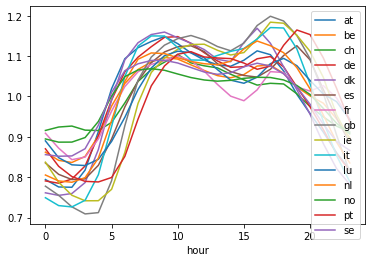

In [26]:
# Variations of consumption during the day

for column in df_hour : 
    df_hour[column] = df_hour[column] / df_hour[column].mean()

df_hour.plot(kind='line')

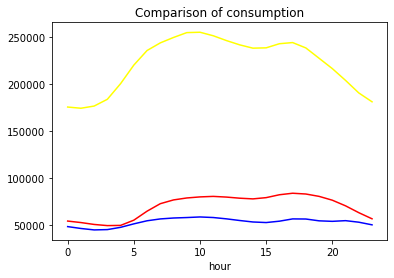

In [27]:
df_hour_loads = df_plot.groupby(['hour']).mean()

# Variations of consumption per country in values
names = ['France', 'Great Britain', 'Germany']

df_hour_loads['fr'].plot(kind='line', color= 'blue')
df_hour_loads['gb'].plot(kind='line', color='red')
df_hour_loads['de'].plot(kind='line', title='Comparison of consumption', color='yellow')

In [60]:
df_hour2 = df_hour.reset_index()

In [61]:
fr = df_hour2['fr'].values
es = df_hour2['es'].values

In [62]:
hour= df_hour2['hour'].values

In [66]:
# Variation of consumption in France and Spain by hour

# Create a blank figure with labels
p = figure(plot_width = 600, plot_height = 600, 
           title = 'Fr vs. Es consumption',
           x_axis_label = 'X', y_axis_label = 'Y')

# Example data
squares_x = hour
squares_y = fr
circles_x = hour
circles_y = es

# Add squares glyph
p.square(squares_x, squares_y, size = 12, color = 'navy', alpha = 0.6, legend_label= 'France')
# Add circle glyph
p.circle(circles_x, circles_y, size = 12, color = 'red', legend_label = 'Spain')

# Set to output the plot in the notebook
output_notebook()
# Show the plot
show(p)

Loading BokehJS ...

In [75]:
df_hour3 = df_hour2.copy()

In [76]:
df_hour3['end_time'] = df_hour3['hour'] +1

In [102]:
# Variation of consumption in France by hour

# Create the blank plot
p = figure(plot_height = 600, plot_width = 600, 
           title = 'Histogram of consumption in Fr',
          x_axis_label = 'Hour', 
           y_axis_label = 'Consumption')

# Add a quad glyph
p.quad(bottom=0, top=df_hour3['fr'], 
       left=df_hour3['hour'], right=df_hour3['end_time'],
       fill_color='grey', line_color='black')


# Add the hover tool to the graph
p.add_tools(HoverTool(tooltips=[("fr", "Consumption")]))

# Show the plot
show(p)

In [111]:
# Variation of consumption in France by hour

output_file("styling_linear_mappers.html", title="styling_linear_mappers.py example")

x = hour
y = fr

#Use the field name of the column source
mapper = linear_cmap(field_name='y', palette=Spectral6 ,low=min(y) ,high=max(y))

source = ColumnDataSource(dict(x=x,y=y))

p = figure(plot_width=300, plot_height=300, title="Variation of consumption in France")

p.circle(x='x', y='y', line_color=mapper,color=mapper, fill_alpha=1, size=12, source=source)

color_bar = ColorBar(color_mapper=mapper['transform'], width=8,  location=(0,0))

p.add_layout(color_bar, 'right')

show(p)

In [125]:
gb = df_hour2['gb'].values

In [128]:
# Variation of consumption in France compared to Spain by hour - greenbox showing night time

output_file("styling_visible_annotation_with_interaction.html")

p = figure(plot_width=600, plot_height=200, tools='')
p.line(hour, fr, line_color="blue")
pink_line = p.line(hour, es, line_color="pink")
yellow_line = p.line(hour, gb, line_color="yellow")

green_box = BoxAnnotation(left=0, right=5.5, fill_color='green', fill_alpha=0.1)
p.add_layout(green_box)

# Use js_link to connect button active property to glyph visible property

toggle1 = Toggle(label="Night", button_type="success", active=True)
toggle1.js_link('active', green_box, 'visible')

toggle2 = Toggle(label="Spain", button_type="success", active=True)
toggle2.js_link('active', pink_line, 'visible')

toggle3 = Toggle(label="Great Britain", button_type="success", active=True)
toggle3.js_link('active', yellow_line, 'visible')

show(layout([p], [toggle1, toggle2, toggle3]))

In [130]:
# Variation of consumption in France by hour

output_file("french_consumption.html")

# create a new plot with specific dimensions
p = figure(plot_width=700)
p.plot_height = 300

p.background_fill_color = "beige"
p.background_fill_alpha = 0.5

p.circle(hour, fr, size=10, color='green')

show(p)

In [131]:
# Variation of consumption in France by hour

output_file("french_consumption.html")

p = figure(plot_width=400, plot_height=400)
r = p.circle(hour, fr)

glyph = r.glyph
glyph.size = 60
glyph.fill_alpha = 0.2
glyph.line_color = "firebrick"
glyph.line_dash = [6, 3]
glyph.line_width = 2

show(p)

In [135]:
# Variation of consumption in France by hour

output_file("fr_consumption.html")



# Basic plot setup
plot = figure(plot_width=600, plot_height=300, tools="",
              toolbar_location=None, title='Variation of consumption in Fr')

plot.line(hour, fr, line_dash="4 4", line_width=1, color='gray')

cr = plot.circle(x, y, size=20,
                fill_color="grey", hover_fill_color="firebrick",
                fill_alpha=0.05, hover_alpha=0.3,
                line_color=None, hover_line_color="white")

plot.add_tools(HoverTool(tooltips=None, renderers=[cr], mode='hline'))

show(plot)